In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_roc_curve, auc, precision_recall_curve,roc_auc_score, roc_curve,log_loss
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

df_original=df.copy()

In [5]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:>

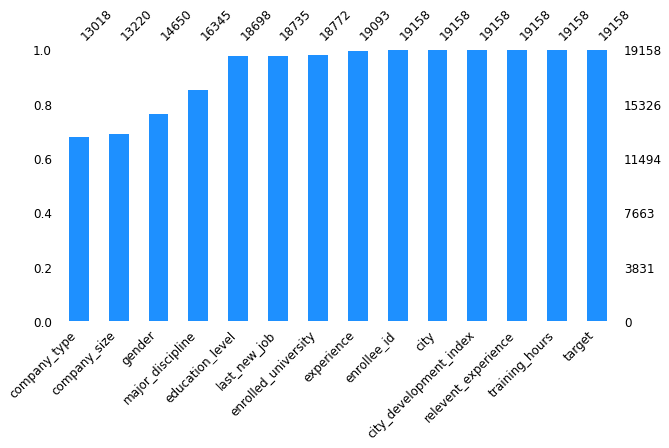

In [8]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

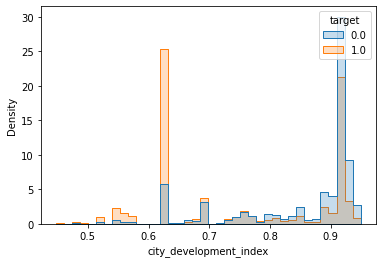

In [9]:
sns.histplot(df, x='city_development_index', hue='target', element="step",stat="density", common_norm=False)

<AxesSubplot:xlabel='gender', ylabel='count'>

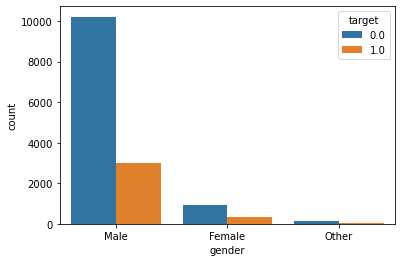

In [10]:
sns.countplot(df['gender'],hue=df['target'])

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

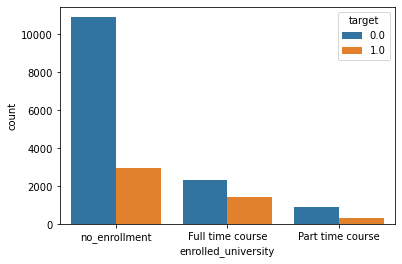

In [11]:
sns.countplot(df['enrolled_university'],hue=df['target'])

<AxesSubplot:xlabel='education_level', ylabel='count'>

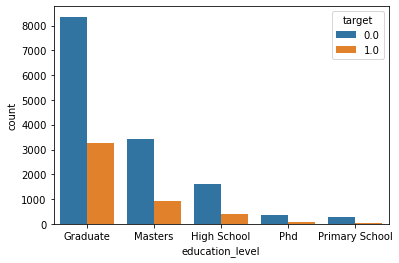

In [12]:
sns.countplot(df['education_level'],hue=df['target'])

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

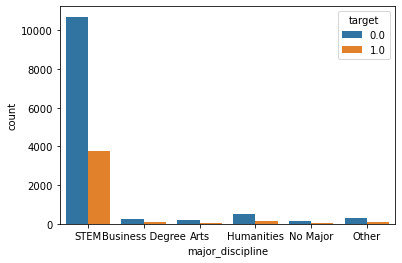

In [13]:
sns.countplot(df['major_discipline'],hue=df['target'])

<AxesSubplot:xlabel='experience', ylabel='count'>

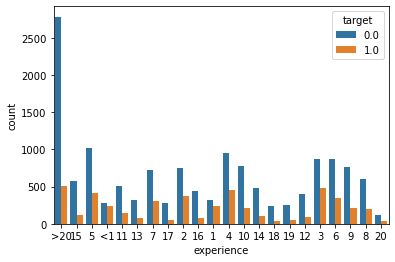

In [14]:
sns.countplot(df['experience'],hue=df['target'])

<AxesSubplot:xlabel='company_size', ylabel='count'>

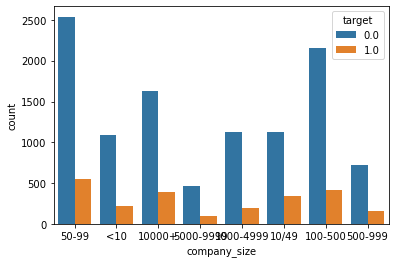

In [15]:
sns.countplot(df['company_size'],hue=df['target'])

<AxesSubplot:xlabel='company_type', ylabel='count'>

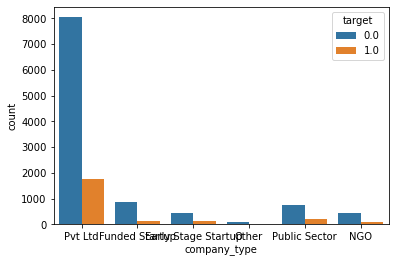

In [16]:
sns.countplot(df['company_type'],hue=df['target'])

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

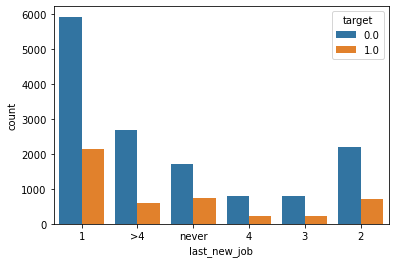

In [17]:
sns.countplot(df['last_new_job'],hue=df['target'])

In [18]:
df.isnull().sum()/df.shape[0]*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [19]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [20]:
gender = {'Female': 2,'Male': 1,'Other': 0}
df['gender']=df['gender'].map(gender)

relevent_experience = {'Has relevent experience':1,'No relevent experience':0}
df['relevent_experience']=df['relevent_experience'].map(relevent_experience)

enrolled_university = {'no_enrollment': 0,'Full time course':1, 'Part time course':2 }
df['enrolled_university']=df['enrolled_university'].map(enrolled_university)

education_level = {'Primary School':0,'High School':1,'Graduate':2,'Masters':3,'Phd':4}
df['education_level']=df['education_level'].map(education_level)

major_discipline ={    'STEM'            :    0,
                'Business Degree'        :    1, 
                'Arts'                   :    2, 
                'Humanities'             :    3, 
                'No Major'               :    4, 
                'Other'                  :    5 }
df['major_discipline']=df['major_discipline'].map(major_discipline)

experience = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21  }
df['experience']=df['experience'].map(experience)

company_size = {'<10'          :    0,
                '10/49'        :    1, 
                '100-500'      :    2, 
                '1000-4999'    :    3, 
                '10000+'       :    4, 
                '50-99'        :    5, 
                '500-999'      :    6, 
                '5000-9999'    :    7 }
df['company_size']=df['company_size'].map(company_size)

company_type = {'Pvt Ltd'               :    0,
                    'Funded Startup'        :    1, 
                    'Early Stage Startup'   :    2, 
                    'Other'                 :    3, 
                    'Public Sector'         :    4, 
                    'NGO'                   :    5 }
df['company_type']=df['company_type'].map(company_type)

last_new_job = {'never'        :    0,
                '1'            :    1, 
                '2'            :    2, 
                '3'            :    3, 
                '4'            :    4, 
                '>4'           :    5 }
df['last_new_job']=df['last_new_job'].map(last_new_job)

In [21]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,1.0,1,0,2,0.0,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,1.0,0,0,2,0.0,15,5.0,0.0,5,47,0.0
2,11561,city_21,0.624,NaN,0,1,2,0.0,5,NaN,NaN,0,83,0.0
4,666,city_162,0.767,1.0,1,0,3,0.0,21,5.0,1.0,4,8,0.0
5,21651,city_176,0.764,NaN,1,2,2,0.0,11,NaN,NaN,1,24,1.0


In [22]:
df_pre=df.copy()
df_train=df.drop(['enrollee_id' ,'city','city_development_index'],axis=1).copy()

In [23]:
knn_imputer = KNNImputer(n_neighbors = 5)

i = np.round(knn_imputer.fit_transform(df_train))
df_train = pd.DataFrame(i, columns = df_train.columns)

In [24]:
df_train

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1.0,1.0,0.0,2.0,0.0,21.0,3.0,0.0,1.0,36.0,1.0
1,1.0,0.0,0.0,2.0,0.0,15.0,5.0,0.0,5.0,47.0,0.0
2,1.0,0.0,1.0,2.0,0.0,5.0,5.0,2.0,0.0,83.0,0.0
3,1.0,1.0,0.0,3.0,0.0,21.0,5.0,1.0,4.0,8.0,0.0
4,1.0,1.0,2.0,2.0,0.0,11.0,2.0,1.0,1.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18009,1.0,0.0,0.0,2.0,3.0,14.0,3.0,1.0,1.0,42.0,1.0
18010,1.0,1.0,0.0,2.0,0.0,14.0,4.0,0.0,4.0,52.0,1.0
18011,1.0,1.0,0.0,2.0,0.0,21.0,5.0,0.0,4.0,44.0,0.0
18012,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,2.0,97.0,0.0


In [25]:
city_development_index=pd.Series(list(df_pre.city_development_index),name='city_development_index')

In [26]:
train_df=pd.concat([city_development_index,df_train],axis=1)

In [27]:
train_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.0,1.0,0.0,2.0,0.0,21.0,3.0,0.0,1.0,36.0,1.0
1,0.776,1.0,0.0,0.0,2.0,0.0,15.0,5.0,0.0,5.0,47.0,0.0
2,0.624,1.0,0.0,1.0,2.0,0.0,5.0,5.0,2.0,0.0,83.0,0.0
3,0.767,1.0,1.0,0.0,3.0,0.0,21.0,5.0,1.0,4.0,8.0,0.0
4,0.764,1.0,1.0,2.0,2.0,0.0,11.0,2.0,1.0,1.0,24.0,1.0


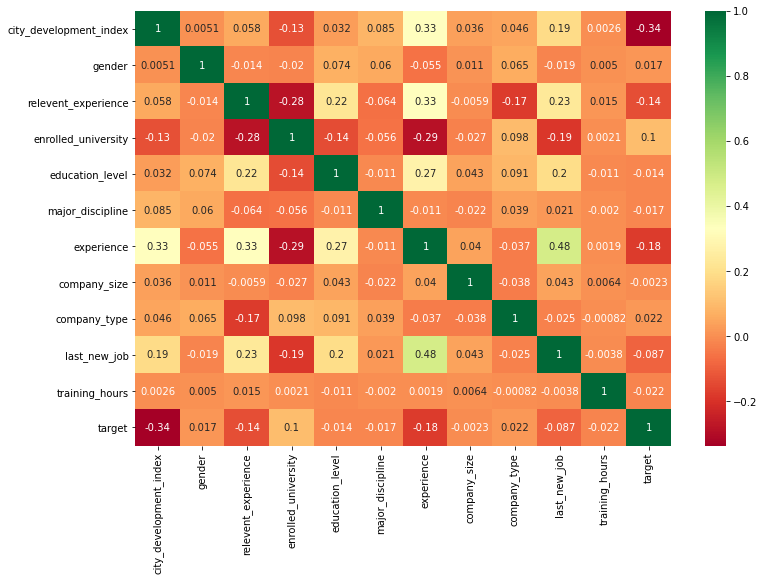

In [28]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='target', ylabel='count'>

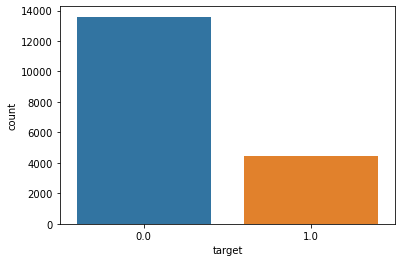

In [29]:
sns.countplot(train_df.target)

In [30]:
train_df.target.value_counts()

0.0    13593
1.0     4421
Name: target, dtype: int64

In [31]:
X=train_df.drop('target',axis=1)
Y=train_df.target

In [32]:
def plot_learning_cuve(model, X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)
    train_loss, test_loss = [], []
    
    for m in range(200,len(x_train),200):
        
        model.fit(x_train.iloc[:m,:], y_train[:m])
        y_train_prob_pred = model.predict_proba(x_train.iloc[:m,:])
        train_loss.append(log_loss(y_train[:m], y_train_prob_pred))
        
        y_test_prob_pred = model.predict_proba(x_test)
        test_loss.append(log_loss(y_test, y_test_prob_pred))
        
    plt.figure(figsize = (15,8))
    plt.plot(train_loss, 'r-+', label = 'Training Loss')
    plt.plot(test_loss, 'b-', label = 'Test Loss')
    plt.xlabel('Number Of Batches')
    plt.ylabel('Log-Loss')
    plt.legend(loc = 'best')
    plt.show()

[17:23:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

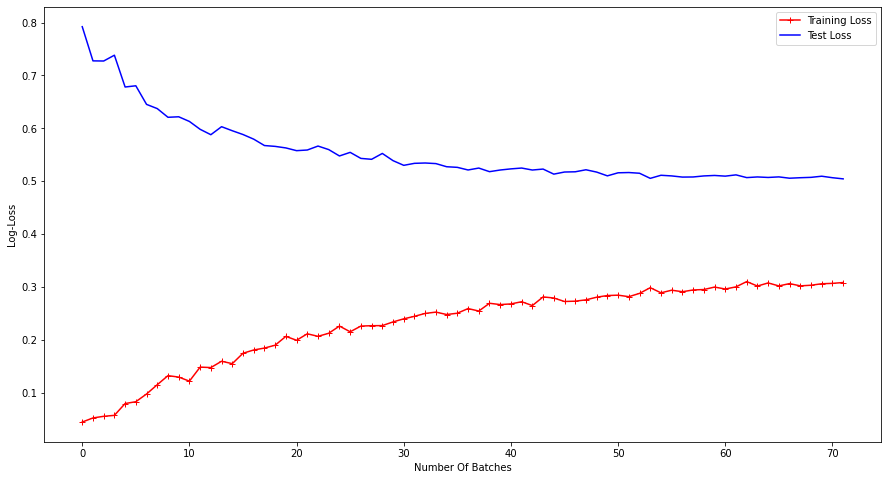

In [33]:
plot_learning_cuve(XGBClassifier(), X, Y)

In [34]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X,Y)

[17:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

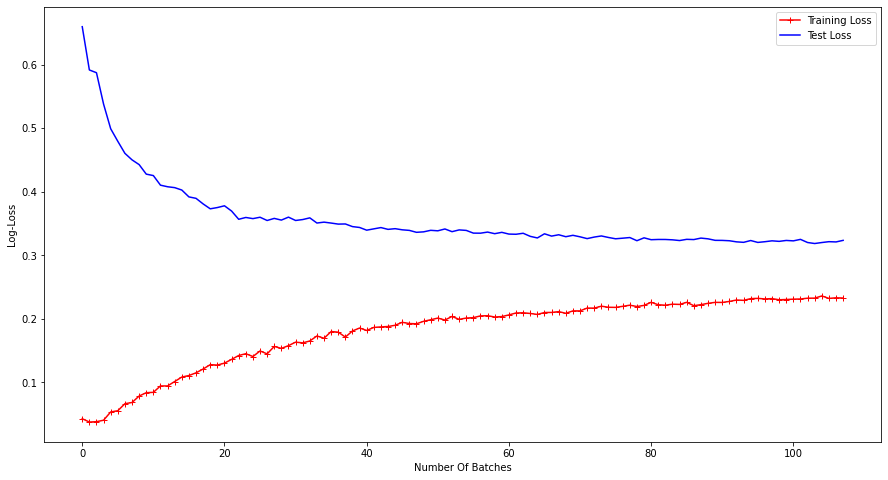

In [35]:
plot_learning_cuve(XGBClassifier(), X_smote, Y_smote)

In [36]:

X_train, X_val, y_train, y_val = train_test_split(X_smote, Y_smote, test_size = 0.2 ,random_state = 38)


In [37]:
clf = XGBClassifier()

params = {
        'min_child_weight': [1, 5, 10,12,15],
        'gamma': [0.5, 1, 1.5, 2,2.5,3,5],
        'subsample': [0.6, 0.8, 1.0,1.2],
        'colsample_bytree': [0.4,0.6, 0.8, 1.0,1.2],
        'max_depth': [2,3, 4, 5,6]
        }

random_cv=RandomizedSearchCV(estimator=clf,param_distributions=params,cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2 
[CV]  subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2, score=(train=nan, test=nan), total=   0.0s
[CV] subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2 
[CV]  subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2, score=(train=nan, test=nan), total=   0.0s
[CV] subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2 
[CV]  subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2, score=(train=nan, test=nan), total=   0.0s
[CV] subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2 
[CV]  subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2, score=(train=nan, test=nan), total=   0.0s
[CV] subsample=1.0, min_child_weight=12, max_depth=6, gamma=3, colsample_bytree=1.2 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.8, min_child_weight=10, max_depth=5, gamma=2.5, colsample_bytree=0.4, score=(train=0.941, test=0.921), total=   0.6s
[CV] subsample=0.8, min_child_weight=10, max_depth=5, gamma=2.5, colsample_bytree=0.4 
[17:25:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, min_child_weight=10, max_depth=5, gamma=2.5, colsample_bytree=0.4, score=(train=0.940, test=0.925), total=   0.6s
[CV] subsample=0.8, min_child_weight=10, max_depth=5, gamma=2.5, colsample_bytree=0.4 
[17:25:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, min_child_weight=10, max_depth=

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.5s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [38]:
random_cv.best_params_

{'subsample': 0.8,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 2.5,
 'colsample_bytree': 0.4}

In [39]:
clf = XGBClassifier(colsample_bytree= 0.4,
 gamma= 2.5,
 max_depth= 5,
 min_child_weigh= 10,
 subsample= 0.8)

clf.fit(X_train, y_train)

[17:25:45] WARNING: ../src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=2.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
clf.score(X_train,y_train)

0.8673901048372264

In [41]:
clf.score(X_val,y_val)

0.8521515262964325

In [42]:
prediction=clf.predict(X_val)
print(confusion_matrix(y_val,prediction))
print(accuracy_score(y_val,prediction))
print(classification_report(y_val,prediction))

[[2421  271]
 [ 533 2213]]
0.8521515262964325
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      2692
         1.0       0.89      0.81      0.85      2746

    accuracy                           0.85      5438
   macro avg       0.86      0.85      0.85      5438
weighted avg       0.86      0.85      0.85      5438



In [43]:
## AUC SCORE

y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_val)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(y_train, y_train_pred_pos)
auc_test = roc_auc_score(y_val, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

fpr, tpr, _ = roc_curve(y_val, y_val_pred_pos)

Train AUC Score 0.9419114115763512
Test AUC Score 0.9290794715317376


In [44]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

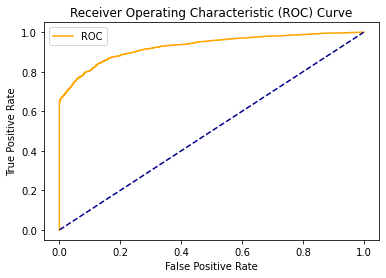

In [45]:
plot_roc_curve(fpr,tpr)

In [46]:
### TEST DATA

In [47]:
test_df=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')

In [48]:
test_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [49]:
test_df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [50]:
gender = {'Female': 2,'Male': 1,'Other': 0}
test_df['gender']=test_df['gender'].map(gender)

relevent_experience = {'Has relevent experience':1,'No relevent experience':0}
test_df['relevent_experience']=test_df['relevent_experience'].map(relevent_experience)

enrolled_university = {'no_enrollment': 0,'Full time course':1, 'Part time course':2 }
test_df['enrolled_university']=test_df['enrolled_university'].map(enrolled_university)

education_level = {'Primary School':0,'High School':1,'Graduate':2,'Masters':3,'Phd':4}
test_df['education_level']=test_df['education_level'].map(education_level)

major_discipline ={    'STEM'            :    0,
                'Business Degree'        :    1, 
                'Arts'                   :    2, 
                'Humanities'             :    3, 
                'No Major'               :    4, 
                'Other'                  :    5 }
test_df['major_discipline']=test_df['major_discipline'].map(major_discipline)

experience = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21  }
test_df['experience']=test_df['experience'].map(experience)

company_size = {'<10'          :    0,
                '10/49'        :    1, 
                '100-500'      :    2, 
                '1000-4999'    :    3, 
                '10000+'       :    4, 
                '50-99'        :    5, 
                '500-999'      :    6, 
                '5000-9999'    :    7 }
test_df['company_size']=test_df['company_size'].map(company_size)

company_type = {'Pvt Ltd'               :    0,
                    'Funded Startup'        :    1, 
                    'Early Stage Startup'   :    2, 
                    'Other'                 :    3, 
                    'Public Sector'         :    4, 
                    'NGO'                   :    5 }
test_df['company_type']=test_df['company_type'].map(company_type)

last_new_job = {'never'        :    0,
                '1'            :    1, 
                '2'            :    2, 
                '3'            :    3, 
                '4'            :    4, 
                '>4'           :    5 }
test_df['last_new_job']=test_df['last_new_job'].map(last_new_job)

In [51]:
new_test_df=test_df.drop(['enrollee_id' ,'city','city_development_index'],axis=1).copy()

In [52]:
i_test = np.round(knn_imputer.fit_transform(new_test_df))
new_test_df = pd.DataFrame(i_test, columns = new_test_df.columns)

In [53]:
new_test_df

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.0,1.0,1.0,2.0,0.0,9.0,0.0,2.0,1.0,21.0
1,2.0,1.0,0.0,2.0,0.0,5.0,2.0,0.0,1.0,98.0
2,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,15.0
3,1.0,1.0,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39.0
4,1.0,1.0,0.0,2.0,0.0,21.0,4.0,0.0,5.0,72.0
...,...,...,...,...,...,...,...,...,...,...
2124,1.0,0.0,0.0,2.0,3.0,16.0,2.0,4.0,4.0,15.0
2125,1.0,1.0,0.0,3.0,0.0,18.0,4.0,0.0,2.0,30.0
2126,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,18.0
2127,1.0,1.0,1.0,1.0,0.0,7.0,2.0,4.0,1.0,84.0


In [54]:
city_development_index=pd.Series(list(test_df.city_development_index),name='city_development_index')

In [55]:
test_df_pre=pd.concat([city_development_index,new_test_df],axis=1)

In [56]:
test_df_pre

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,1.0,1.0,1.0,2.0,0.0,9.0,0.0,2.0,1.0,21.0
1,0.920,2.0,1.0,0.0,2.0,0.0,5.0,2.0,0.0,1.0,98.0
2,0.624,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,15.0
3,0.827,1.0,1.0,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39.0
4,0.920,1.0,1.0,0.0,2.0,0.0,21.0,4.0,0.0,5.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,1.0,0.0,0.0,2.0,3.0,16.0,2.0,4.0,4.0,15.0
2125,0.897,1.0,1.0,0.0,3.0,0.0,18.0,4.0,0.0,2.0,30.0
2126,0.887,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,18.0
2127,0.804,1.0,1.0,1.0,1.0,0.0,7.0,2.0,4.0,1.0,84.0


In [57]:
test_df_predictions=clf.predict(test_df_pre)

In [58]:
d={'enrollee_id':test_df.enrollee_id,'leave_job':test_df_predictions}
test_data_final_predictions=pd.DataFrame(d)

In [59]:
test_data_final_predictions.replace(to_replace = 1.0,value = 'Yes',inplace = True)
test_data_final_predictions.replace(to_replace = 0.0,value='No',inplace = True )
test_data_final_predictions

,enrollee_id,leave_job
0,32403,No
1,9858,No
2,31806,Yes
3,27385,No
4,27724,No
...,...,...
2124,1289,No
2125,195,No
2126,31762,No
2127,7873,No


No     1727
Yes     402
Name: leave_job, dtype: int64


<AxesSubplot:xlabel='leave_job', ylabel='count'>

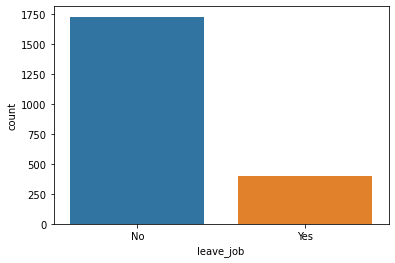

In [60]:
print(test_data_final_predictions.leave_job.value_counts())
sns.countplot(test_data_final_predictions.leave_job)